# **Data Analysis Skill Test**
 * João Vitor Bracale de Jesus

# Case 1 

Importing libraries and dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import seaborn as sns

dataset = pd.read_csv('TFP.csv',delimiter=',')
dataset.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [ ]:
dataset.shape

(186, 3)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   isocode  186 non-null    object 
 1   year     186 non-null    int64  
 2   rtfpna   186 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [ ]:
dataset.describe()

,year,rtfpna
count,186.000000,186.000000
mean,1980.500000,0.975614
std,17.943831,0.177538
min,1950.000000,0.617148
25%,1965.000000,0.855143
50%,1980.500000,0.995047
75%,1996.000000,1.046348
max,2011.000000,1.383718


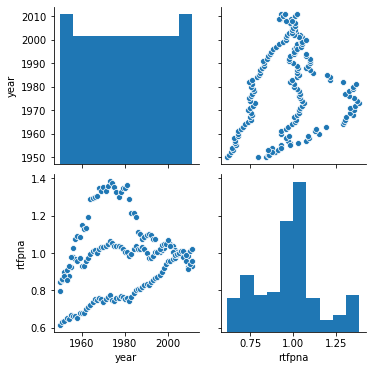

In [ ]:
sns.pairplot(dataset)

Text(0, 0.5, 'Rtfpna')

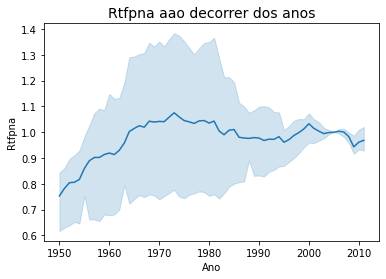

In [ ]:
plt.title('Rtfpna ao decorrer dos anos', fontsize = 14)
sns.lineplot(x = 'year',
              data = dataset,
              y = 'rtfpna')
plt.xlabel('Ano')
plt.ylabel('Rtfpna')

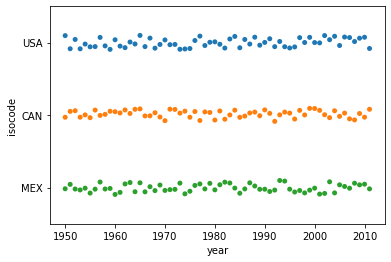

In [ ]:
sns.stripplot(x='year', y='isocode', data=dataset)

In [ ]:
dataset['isocode'] = dataset['isocode'].map({'USA':0,'CAN':1,'MEX':2})

In [ ]:
datasetGP = dataset[['year','rtfpna']]
datasetGP=datasetGP.groupby(['year']).mean()
datasetGP

,rtfpna
year,
1950,0.752881
1951,0.781881
1952,0.803969
1953,0.805907
1954,0.816842
...,...
2007,1.000567
2008,0.982801
2009,0.943033


In [ ]:
train,test = datasetGP[:-10], datasetGP[-10:]

In [ ]:
print(train.shape)
print(test.shape)

(52, 1)
(10, 1)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
n_input = 10
n_features = 1

generator = TimeseriesGenerator(train, train, length = n_input, batch_size = 6)

model = Sequential()
model.add(LSTM(200, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

model.fit_generator (generator, epochs = 300)

Epoch 1/300
7/7 [==============================] - 0s 59ms/step - loss: 0.5107
Epoch 2/300
7/7 [==============================] - 0s 17ms/step - loss: 0.1892
Epoch 3/300
7/7 [==============================] - 0s 19ms/step - loss: 0.0583
Epoch 4/300
7/7 [==============================] - 0s 20ms/step - loss: 0.0269
Epoch 5/300
7/7 [==============================] - 0s 16ms/step - loss: 0.0365
Epoch 6/300
7/7 [==============================] - 0s 16ms/step - loss: 0.0243
Epoch 7/300
7/7 [==============================] - 0s 17ms/step - loss: 0.0182
Epoch 8/300
7/7 [==============================] - 0s 16ms/step - loss: 0.0222
Epoch 9/300
7/7 [==============================] - 0s 17ms/step - loss: 0.0171
Epoch 10/300
7/7 [==============================] - 0s 16ms/step - loss: 0.0193
Epoch 11/300
7/7 [==============================] - 0s 16ms/step - loss: 0.0138
Epoch 12/300
7/7 [==============================] - 0s 17ms/step - loss: 0.0192
Epoch 13/300
7/7 [==============================]

In [ ]:
import numpy as np

pred_list =[]

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[pred_list[i]]], axis =1)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index = dataset[-n_input:].index,
                         columns =['Predictions'])

df_test = pd.concat([dataset,df_predict]) 


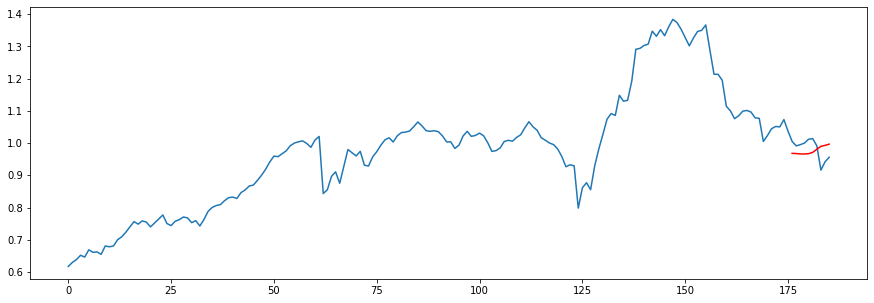

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df_test.index, df_test['rtfpna'])
plt.plot(df_test.index, df_test['Predictions'], color = 'r')
plt.show()

In [ ]:
train = datasetGP

scaler.fit (train)
train = scaler.transform(train)

n_input = 10
n_features = 1

generator = TimeseriesGenerator(train, train, length = n_input, batch_size = 6)

model.fit_generator (generator, epochs = 300)

pred_list=[]

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range (n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[pred_list[i]]], axis =1)
    

Epoch 1/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0039
Epoch 2/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0028
Epoch 3/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0034
Epoch 4/300
9/9 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 5/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0032
Epoch 6/300
9/9 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 7/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0030
Epoch 8/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0037
Epoch 9/300
9/9 [==============================] - 0s 17ms/step - loss: 0.0041
Epoch 10/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 11/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0026
Epoch 12/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 13/300
9/9 [==============================]

In [ ]:
datasetPred =datasetGP.reset_index()


In [ ]:
datasetPred

,year,rtfpna
0,1950,0.752881
1,1951,0.781881
2,1952,0.803969
3,1953,0.805907
4,1954,0.816842
...,...,...
57,2007,1.000567
58,2008,0.982801
59,2009,0.943033
60,2010,0.961211


In [ ]:
from pandas.tseries.offsets import DateOffset
final_date=[]

for x in datasetPred['year']+ 10:   
    final_date.append(str(x)[:10])
final_date

futures_dates = pd.DataFrame(index = final_date[1:], columns = datasetPred.columns)

In [ ]:
df_predict = pd.DataFrame (scaler.inverse_transform(pred_list),
                          index = futures_dates[-n_input:].index,
                          columns = ['Predictions'])

df_proj = pd.concat ([dataseta, df_predict], axis =1)

In [ ]:
df_predict

,Predictions
2012,0.971230
2013,0.970671
2014,0.968115
2015,0.967045
2016,0.967107
2017,0.972047
2018,0.982934
2019,0.995311
2020,0.998421
2021,1.001144


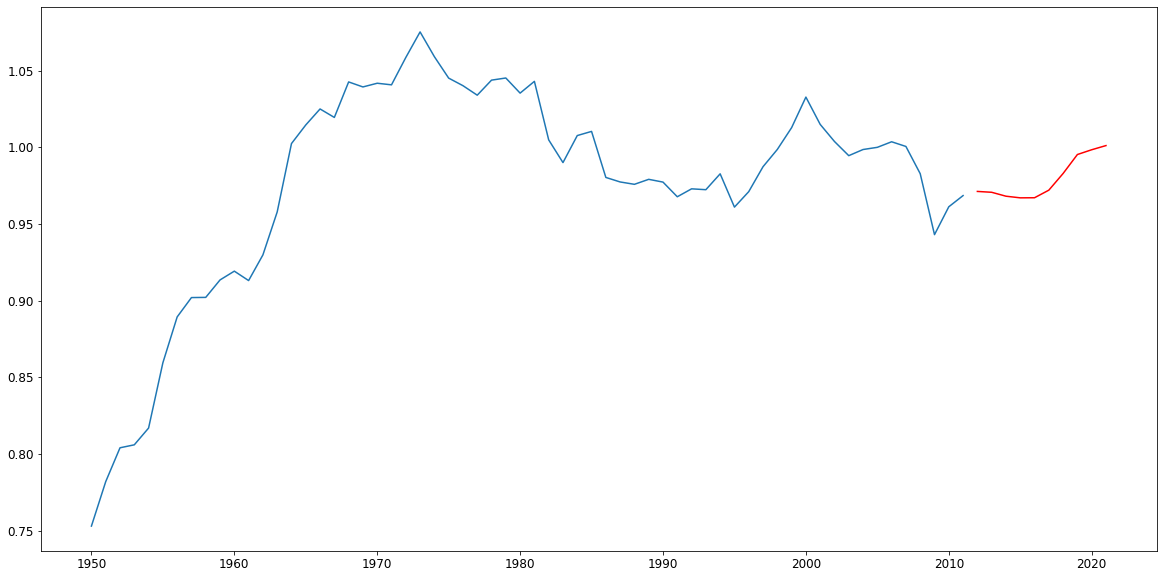

In [ ]:
plt.figure (figsize = (20,10))
plt.plot(df_proj.index, df_proj['rtfpna'])
plt.plot (df_proj.index, df_proj['Predictions'], color = 'r')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain.


Encontrei algumas features que ajudariam e muito para uma previsão e modelo mais robusto. 

Entretanto gostaria de citar principalmente as: "pl_i, pl_c, pl_g, pl_x, pl_m, pl_k, pl_gdpe e pl_gdpo  
uma vez que é um problema de séries temporais e escolhi uma rede neural LSTM para uma resolução mais prática e visual.

Portanto variavíes historicas e correlacionadas, são importante e muito eficazes para melhoria do modelo.

# Case 2

In [3]:
dataset_case2 = pd.read_excel('covariates.xlsx')
dataset_case2.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [4]:
dataset_case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                52 non-null     int64  
 1   price_soybeans      51 non-null     float64
 2   price_corn          51 non-null     float64
 3   price_soybean_meal  51 non-null     float64
 4   gdp_china           52 non-null     float64
 5   gdp_iran            52 non-null     float64
 6   gpd_netherlands     51 non-null     float64
 7   gdp_spain           52 non-null     float64
 8   gdp_thailand        52 non-null     float64
 9   gdp_world           52 non-null     float64
 10  gdp_egypt           52 non-null     float64
 11  gdp_japan           52 non-null     float64
 12  gdp_vietnam         52 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 5.4 KB


In [5]:
dataset_case2.isnull().sum()

year                  0
price_soybeans        1
price_corn            1
price_soybean_meal    1
gdp_china             0
gdp_iran              0
gpd_netherlands       1
gdp_spain             0
gdp_thailand          0
gdp_world             0
gdp_egypt             0
gdp_japan             0
gdp_vietnam           0
dtype: int64

In [6]:
dataset_case2.dropna(inplace=True)

Answer number 1:

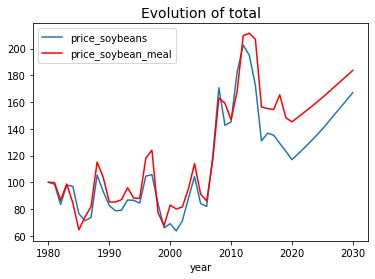

In [7]:
ax = plt.gca()
plt.title('Evolution of total', fontsize = 14)
dataset_case2.plot(kind='line',x='year',y='price_soybeans',ax=ax)
dataset_case2.plot(kind='line',x='year',y='price_soybean_meal', color='red', ax=ax)

plt.show()

Answer number 2:



In [36]:
dt_5year = dataset_case2[dataset_case2['year'] > 2025]
dt_5year.groupby(['price_corn','price_soybeans','price_soybean_meal']).sum()

,,,year,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
price_corn,price_soybeans,price_soybean_meal,,,,,,,,,,
150.142281,145.203519,167.410250,2026,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433
154.391956,150.660041,171.480405,2027,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713
158.641630,156.116564,175.550560,2028,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695
162.891304,161.573086,179.620715,2029,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405
167.140979,167.029608,183.690870,2030,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175
